# Project -1 The World Happiness Report Data Analysis

## Problem Statement:

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [70]:
# Lets  start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from scipy.stats import skew 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

# Examine Data

In [71]:
WHR=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
WHR

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Checking the Null value in the dataframe 

In [72]:
WHR.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [73]:
WHR.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

since there is no null value so we can proceed 

In [74]:
# Check duplicate value in given datset 
WHR.duplicated().sum()

0

there is no duplicate in data set so good to proceed

## Checking data type of the columns

In [75]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',WHR.shape)
print('Each column and data type and its count','\n')
print(WHR.info())

Shape         ------> (158, 12)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 n

In [76]:
WHR.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [77]:
# Chcking the data of top 10 happiest countries.

WHR.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [78]:
# Chcking the data of top 10 happiest countries.
WHR.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


# Manipulating Data

## observation about each columns

We are going to country ,region , ranking data in to data set because there all are name sick data

In [79]:
# DROP ALERT vail -type column
WHR = WHR.drop(['Country','Region','Happiness Rank','Standard Error'],axis=1)

In [80]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',WHR.shape)
print('Each column and data type and its count','\n')
print(WHR.info())

Shape         ------> (158, 8)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB
None


In [81]:
WHR.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Let's visualize the data and analyze 

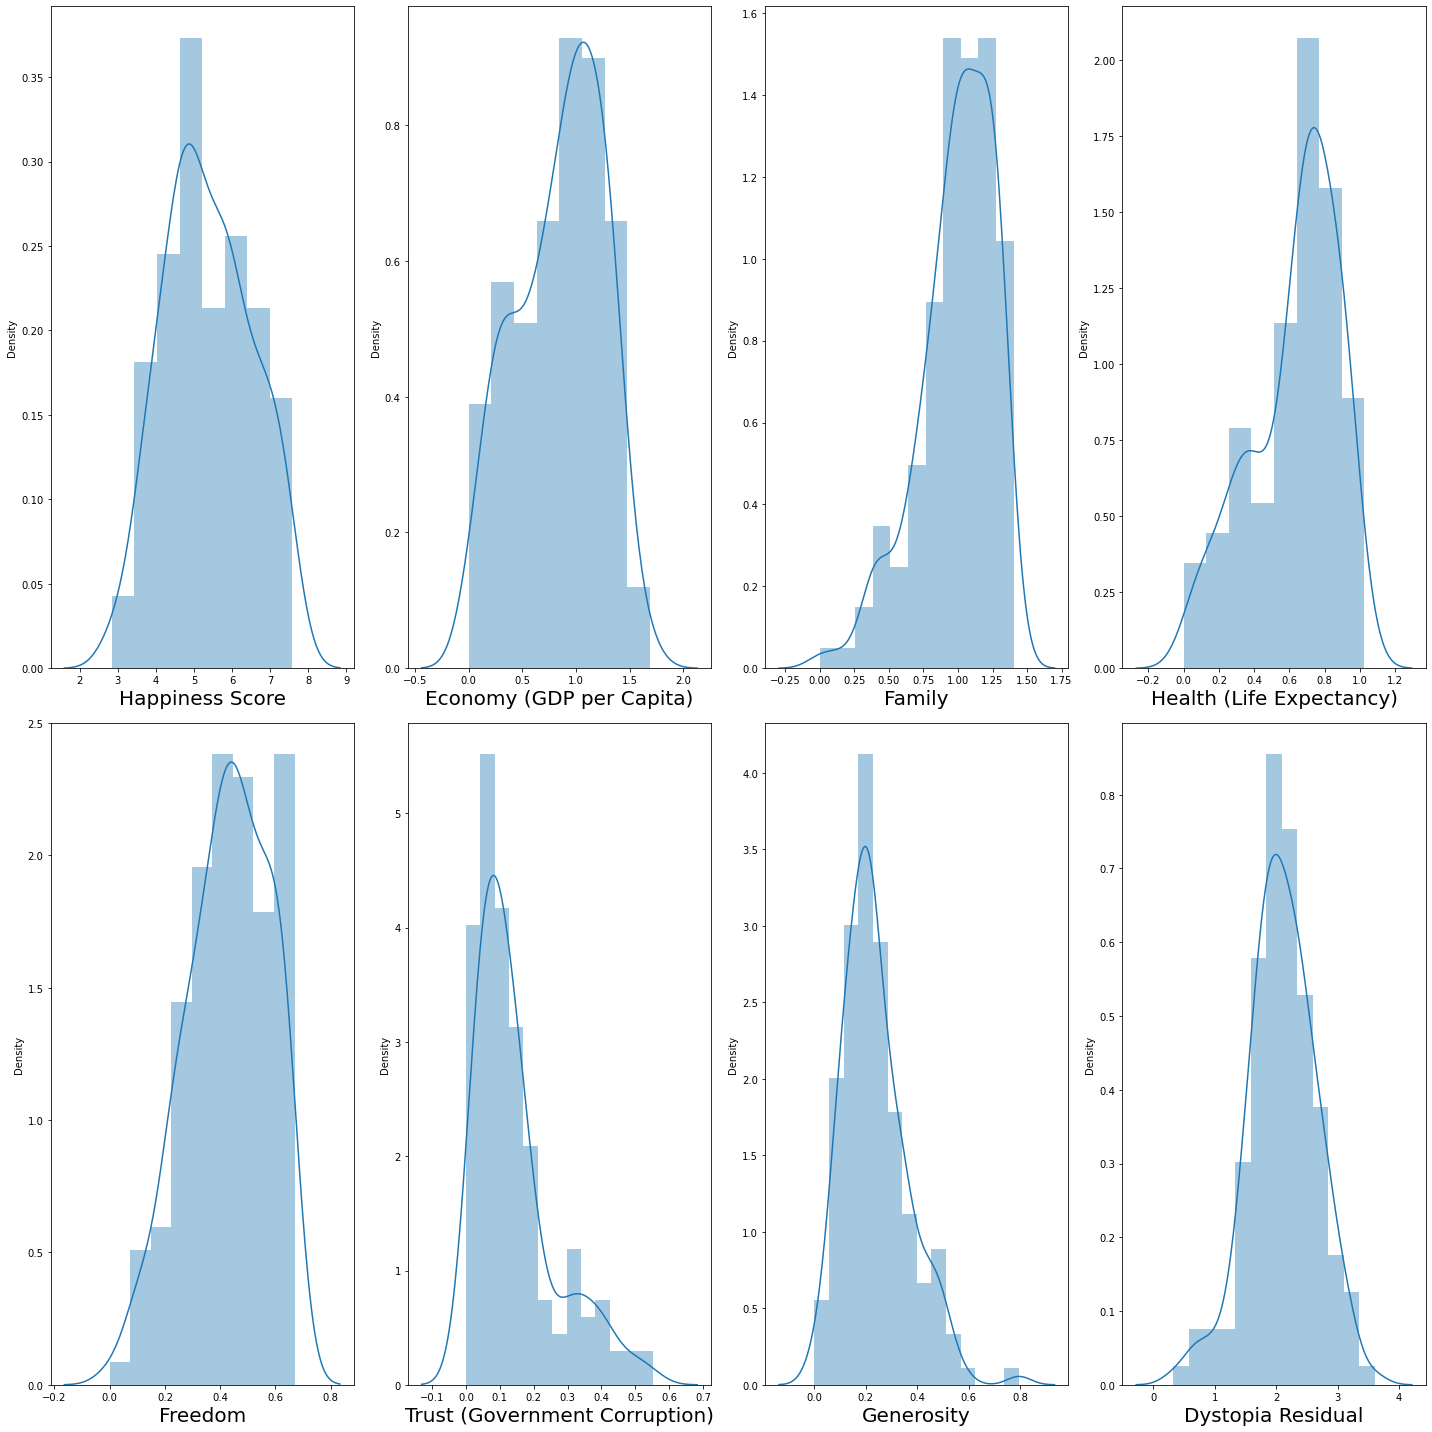

In [84]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in WHR:
    if plotnumber<=9:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(WHR[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

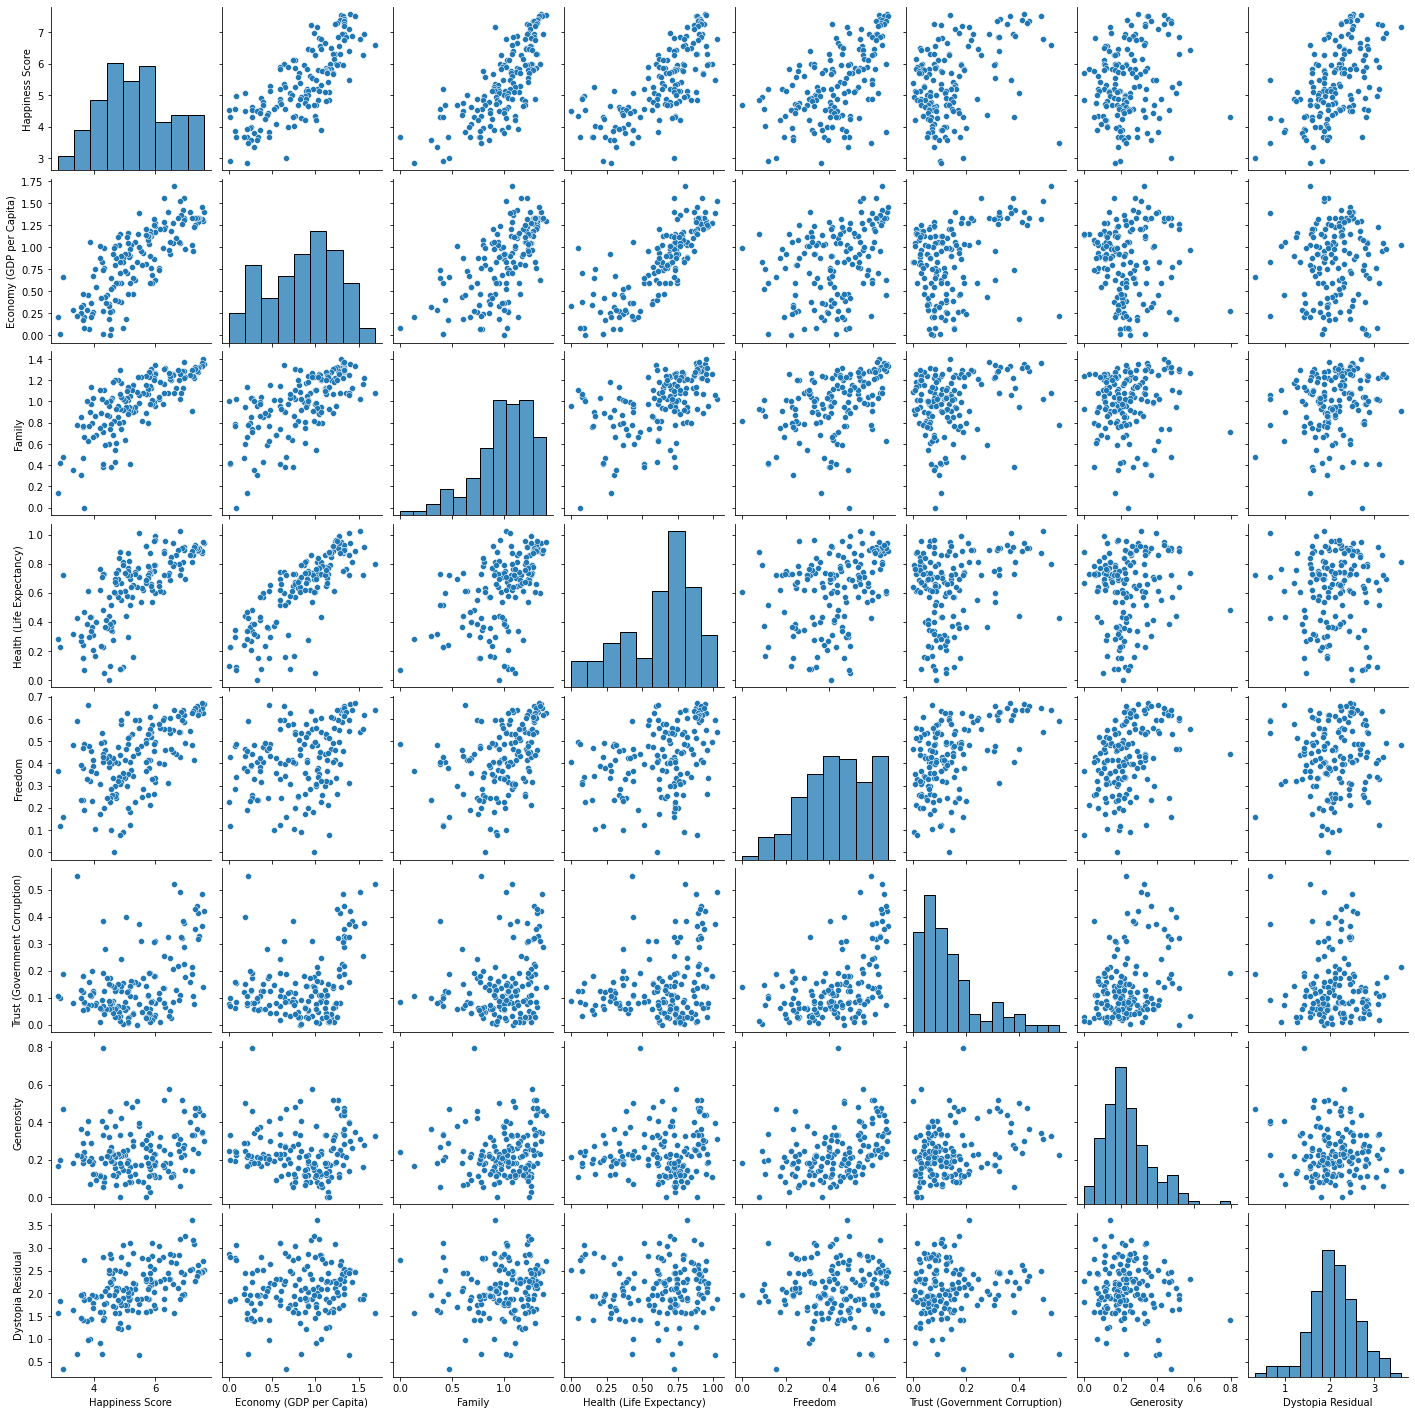

In [85]:
sns.pairplot(WHR)

# Plotting Heatmap (correlation matrix )
lets try to see if we can reduce the feature using different techniques

lets plot heatmap to visualize and find the coeffcient of multicollinarity

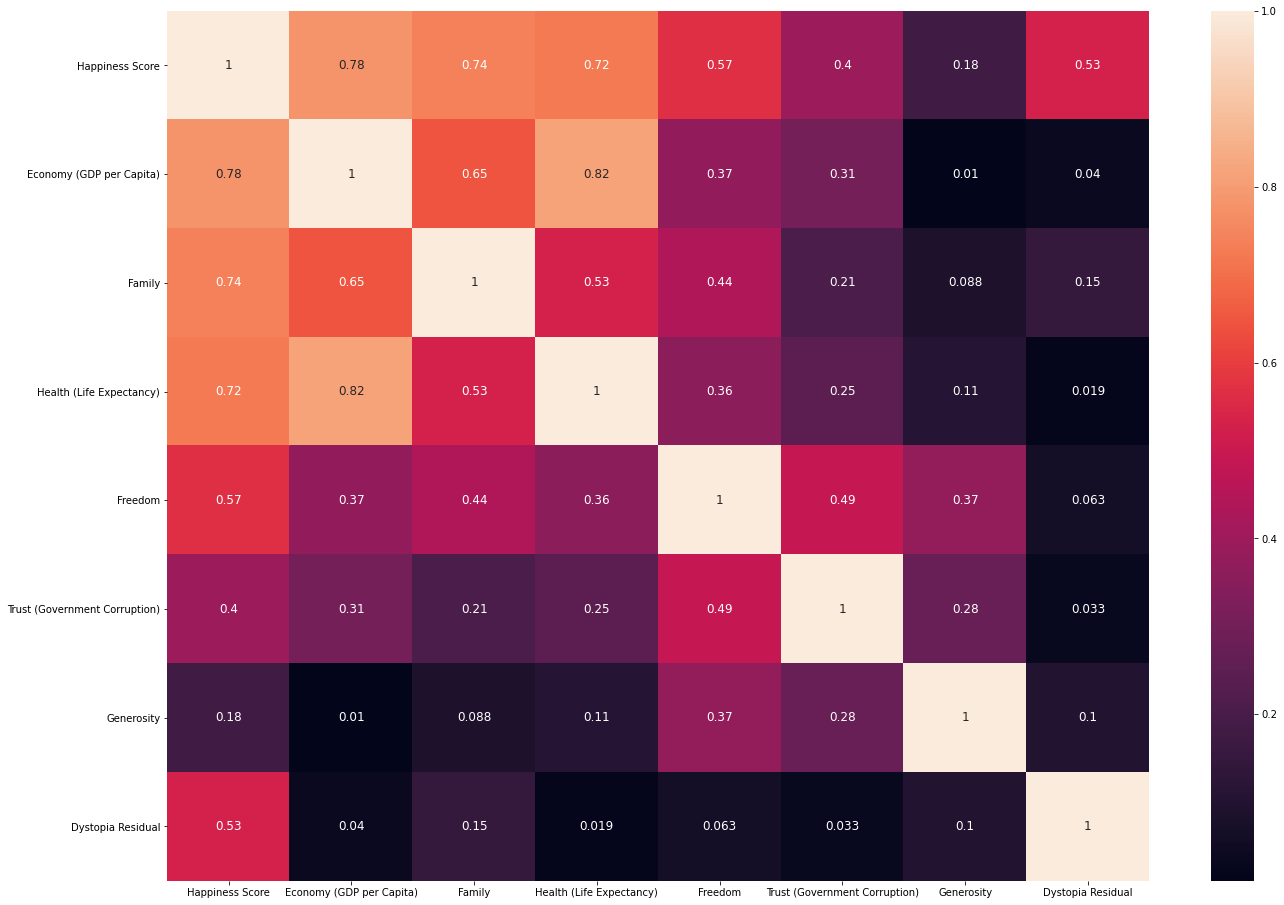

In [86]:
df_corr = WHR.corr().abs() #Corr method  =co-realation co-efficient ,# abs =Absolute nuumer 

# this code will get the coefficient of one variable vs all other variable (relationship)
# annot= true (used to display number) 
#aanot_KWs =size of number 

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12}) 
plt.show()


# The value lies between -1 to 1 (-1 Negatively correlation ) & (+1 Positively correlation )

0.09683844783925286
-0.31455171687947103
-0.997308693697779
-0.69861459190758
-0.4095263034516996
1.3722746285872593
0.9924230947758468
-0.2366366607660101


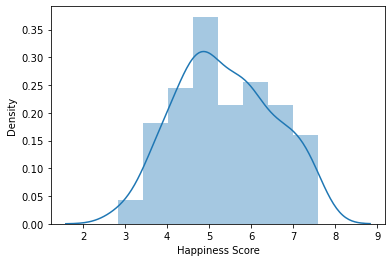

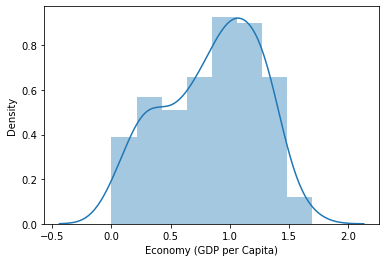

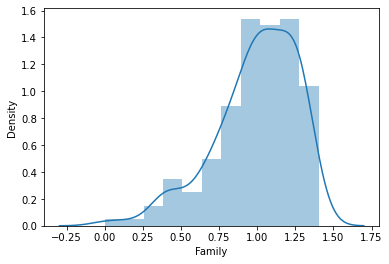

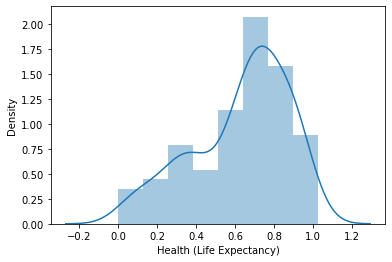

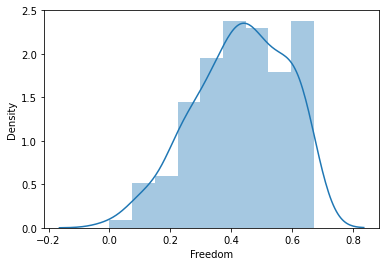

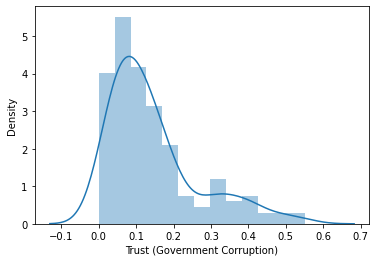

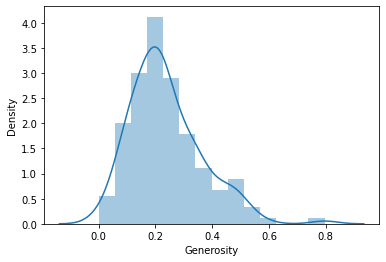

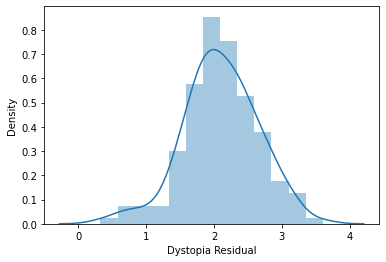

In [87]:
for col in WHR:
    print(skew(WHR[col]))
    plt.figure()
    sns.distplot(WHR[col])
    plt.show

In [88]:
WHR.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

## Keeping +/-0.5 as the range fro skewness ,here are the columns which does not lie within this range 

Standared Error

Family 

Health(life Expectancy)

Trust (Government Corruption)

Generosity


In [89]:
WHR["Generosity"]=np.sqrt(WHR["Generosity"])
WHR.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [90]:
WHR["Trust (Government Corruption)"]=np.sqrt(WHR["Trust (Government Corruption)"])
WHR.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [91]:
WHR["Family"]=np.square(WHR["Family"])
WHR.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [92]:
WHR["Health (Life Expectancy)"]=np.square(WHR["Health (Life Expectancy)"])
WHR.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

## Check the skewness

0.09683844783925286
-0.31455171687947103
-0.25329340376725634
-0.013928984989214062
-0.4095263034516996
0.5028308183891492
-0.1297145487213065
-0.2366366607660101


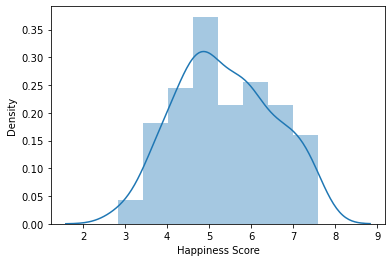

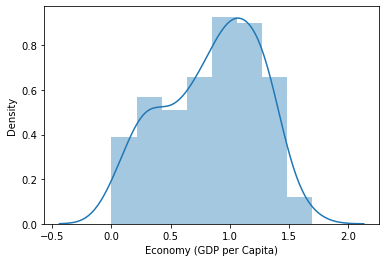

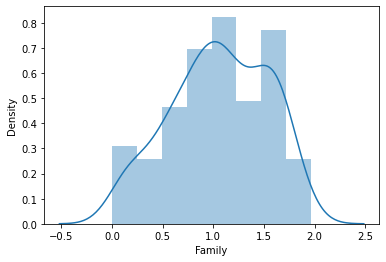

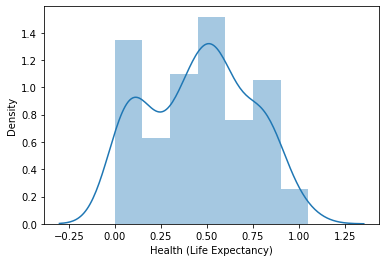

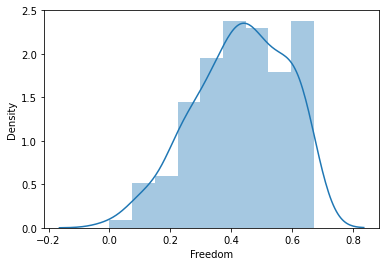

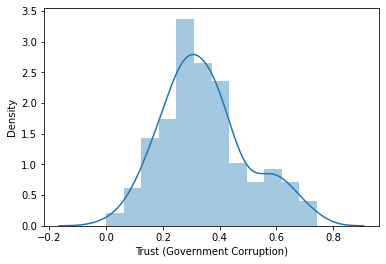

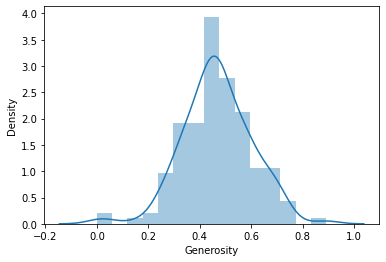

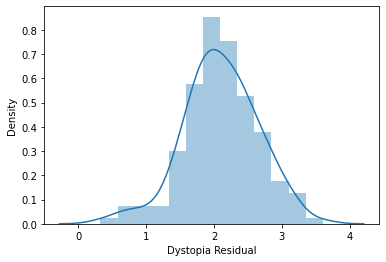

In [93]:
for col in WHR:
    print(skew(WHR[col]))
    plt.figure()
    sns.distplot(WHR[col])
    plt.show

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead! 



In [96]:
WHR.shape


(158, 8)

In [97]:
WHR

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.821177,0.886290,0.66557,0.647904,0.544775,2.51738
1,7.561,1.30232,1.966249,0.898401,0.62877,0.376098,0.660530,2.70201
2,7.527,1.32548,1.851178,0.764995,0.64938,0.695392,0.584286,2.49204
3,7.522,1.45900,1.771428,0.783597,0.66973,0.604177,0.589059,2.46531
4,7.427,1.32629,1.749297,0.820166,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.598612,0.183732,0.59201,0.742906,0.475689,0.67042
154,3.340,0.28665,0.125217,0.101825,0.48450,0.283019,0.427317,1.63328
155,3.006,0.66320,0.225521,0.521183,0.15684,0.434810,0.686870,0.32858
156,2.905,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302


# Preparing Data for Machine Learning

Now we will choose x and y axis and split these datas to train or test.

In [98]:
# Divide data set into features and label

X= WHR.drop(['Happiness Score'],axis=1)

y=WHR['Happiness Score']

In [99]:
# Checking label data set 
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [100]:
# checking Features data set 
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.821177,0.886290,0.66557,0.647904,0.544775,2.51738
1,1.30232,1.966249,0.898401,0.62877,0.376098,0.660530,2.70201
2,1.32548,1.851178,0.764995,0.64938,0.695392,0.584286,2.49204
3,1.45900,1.771428,0.783597,0.66973,0.604177,0.589059,2.46531
4,1.32629,1.749297,0.820166,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.598612,0.183732,0.59201,0.742906,0.475689,0.67042
154,0.28665,0.125217,0.101825,0.48450,0.283019,0.427317,1.63328
155,0.66320,0.225521,0.521183,0.15684,0.434810,0.686870,0.32858
156,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302


## Let's observe the relationship between independent variables and dependent variable.

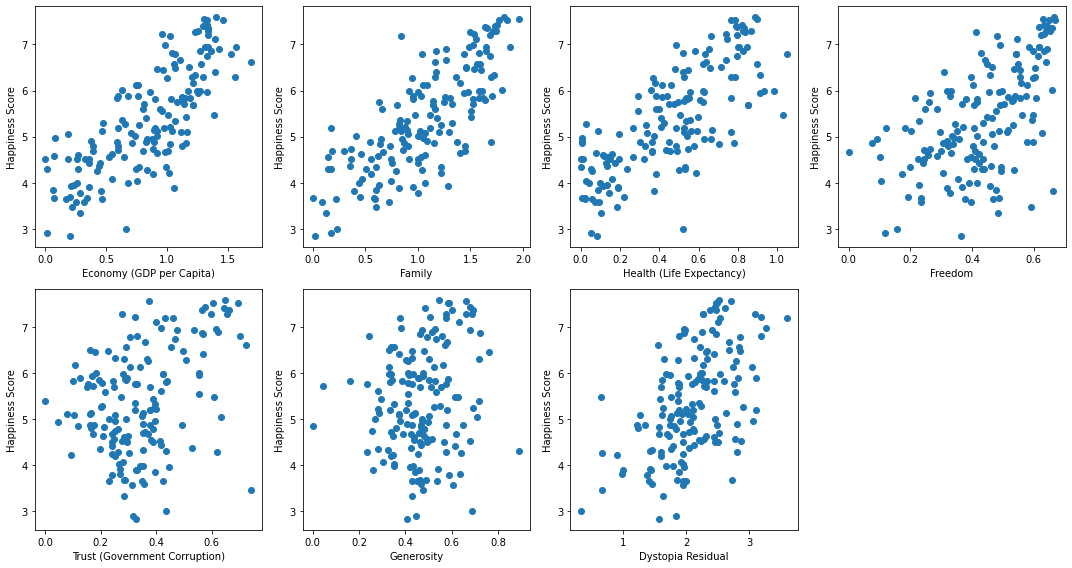

In [101]:
# Visualizing relationship

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score',fontsize=10)      
        
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

In [109]:
# Data Scaling. Formula Z = (X - mean)/std

scaler = StandardScaler()

X_scaled= scaler.fit_transform(X)

In [110]:
# Building model to test unexposed data

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=50)

y_train.head()

48     5.960
148    3.667
41     6.130
7      7.364
97     4.885
Name: Happiness Score, dtype: float64

# Model instantiating and training

In [111]:
regression = LinearRegression()

regression.fit(x_train, y_train )

LinearRegression()

## Predict the happieness Score given features

In [112]:
WHR.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,2.905,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302
157,2.839,0.20868,0.019586,0.080900,0.36453,0.327582,0.408424,1.56726


In [113]:
#since we have already fit the scaler ,you can transfer the data 

# Predict is method used to predict chance of admission 
# Scaler is method convert data into scaled data Then transform 

print ('Happiness Score is:',regression.predict(scaler.transform([[0.20868,0.019586,0.080900,0.36453,0.327582
                                                                   ,0.408424,1.56726]])))

Happiness Score is: [3.16367663]


## You can save the model and later you can use it for prediction 

In [114]:
# saving the model to the local file system 
# dump is method to save the model 
# Wb = Write 

import pickle

filename = 'finalized_model.pickle'

pickle.dump(regression, open (filename,'wb')) 

In [115]:
# Adjusted R2 score
# score is adjusted score (here we understand how well model got trained)

regression.score(x_train, y_train)

0.993070086396772

## Let's check how well model fits the test data.

In [117]:
regression.score(x_test,y_test)

0.992551421906039

In [120]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
alpha

7.805184041303946e-05

In [122]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9925488708286544

In [124]:
y_pred=regression.predict(x_test)
mean_absolute_error(y_test,y_pred)

0.07702425145324761

In [125]:
## Let's plot and visualize 

In [126]:
# here we predict for all X_test data 

y_pred= regression.predict(x_test)
y_pred

array([6.87265012, 5.57150997, 4.66087473, 4.56743092, 7.28146294,
       5.29385906, 4.02720694, 5.16733189, 6.85625172, 3.73496718,
       6.81499569, 5.03109959, 3.7356992 , 6.36981351, 6.99787373,
       4.30089259, 3.07127326, 5.31852013, 5.93695303, 4.40721885,
       6.18073032, 4.59912824, 5.15789616, 5.11670982, 7.15864333,
       4.04616833, 4.57830482, 5.84643221, 3.93109085, 3.82702743,
       3.65190922, 4.84445687, 3.61017105, 4.73074253, 5.48706413,
       5.09390953, 6.31262288, 6.79163461, 7.5633875 , 3.16367686])

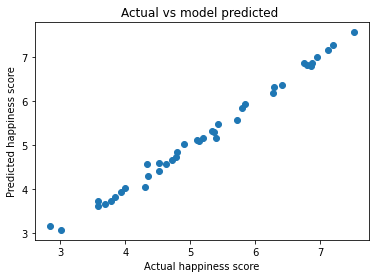

In [127]:
#Now we compare with actual vs predict 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('Predicted happiness score')
plt.title('Actual vs model predicted ')
plt.show()